In [29]:
library(SingleCellExperiment)
library(ggplot2)

In [64]:
## input files folder
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/input_files/"

In [1]:
### Neuroseq 10x data
### DA - all conditions (D30, D52, D52ROT)
### meta-cells
sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/Pseudobulk_per_donor_DA_all_conditions_Leiden_res34_sce.rds")

In [2]:
sce

class: SingleCellExperiment 
dim: 32738 8479 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(8479): iudw_1-d30-cluster0 iudw_1-d30-cluster1 ...
  rozh_4-d52_tr-cluster11 rozh_4-d52_tr-cluster12
colData names(8): celltype donor_id ... donor pseudocell
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [3]:
## make sample mapping file
df = data.frame(genotype_individual_id = sce$donor_id,
                phenotype_sample_id = colnames(sce))
head(df,2)

genotype_individual_id,phenotype_sample_id
HPSI0714i-iudw_1,iudw_1-d30-cluster0
HPSI0714i-iudw_1,iudw_1-d30-cluster1


In [6]:
smf_filename = paste0(mydir,"sample_mapping_file.csv")
write.csv(df, smf_filename, quote = F, row.names = F)

In [ ]:
## make phenotype file

In [12]:
counts(sce)[1:5,1:5]

,iudw_1-d30-cluster0,iudw_1-d30-cluster1,iudw_1-d30-cluster2,iudw_1-d30-cluster3,iudw_1-d30-cluster4
ENSG00000243485,0,0,0,0,0
ENSG00000237613,0,0,0,0,0
ENSG00000186092,0,0,0,0,0
ENSG00000238009,0,0,0,0,0
ENSG00000239945,0,0,0,0,0


In [13]:
df_pheno = as.data.frame(counts(sce))
pheno_filename = paste0(mydir,"phenotype.csv")
write.csv(df_pheno, pheno_filename, quote = F)

In [14]:
## make env file (PCs)

In [20]:
logcounts(sce) = counts(sce)

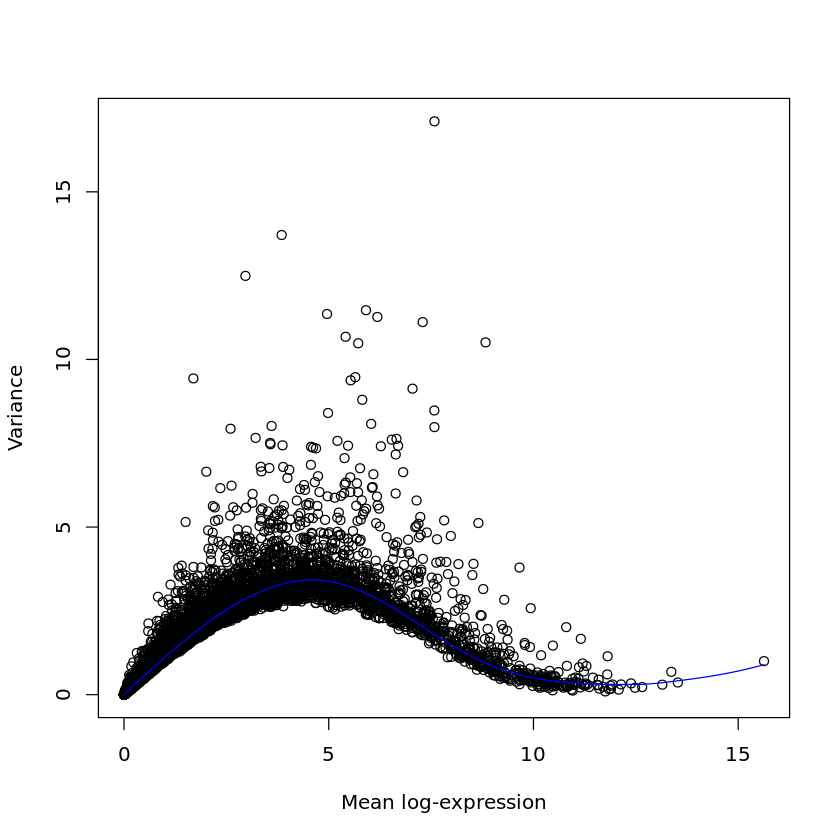

In [24]:
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [22]:
top.500.hvgs = rownames(dec1[order(dec1$bio, decreasing = TRUE),][1:500,])

In [23]:
pcs = prcomp(t(df_pheno[top.500.hvgs,]))
# summary(pcs)

Importance of components:
                           PC1      PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     24.2762 14.39806 9.47953 8.43919 6.90905 6.78340 5.83161
Proportion of Variance  0.2647  0.09312 0.04037 0.03199 0.02144 0.02067 0.01528
Cumulative Proportion   0.2647  0.35785 0.39821 0.43021 0.45165 0.47232 0.48759
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     5.32076 5.12698 4.88919 4.85906 4.49303 4.38225 4.22369
Proportion of Variance 0.01272 0.01181 0.01074 0.01061 0.00907 0.00863 0.00801
Cumulative Proportion  0.50031 0.51212 0.52286 0.53346 0.54253 0.55116 0.55917
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     4.06536 3.96877 3.71245 3.62082 3.47215 3.3698 3.21414
Proportion of Variance 0.00742 0.00708 0.00619 0.00589 0.00542 0.0051 0.00464
Cumulative Proportion  0.56659 0.57367 0.57986 0.58575 0.59117 0.5963 0.60091
                          

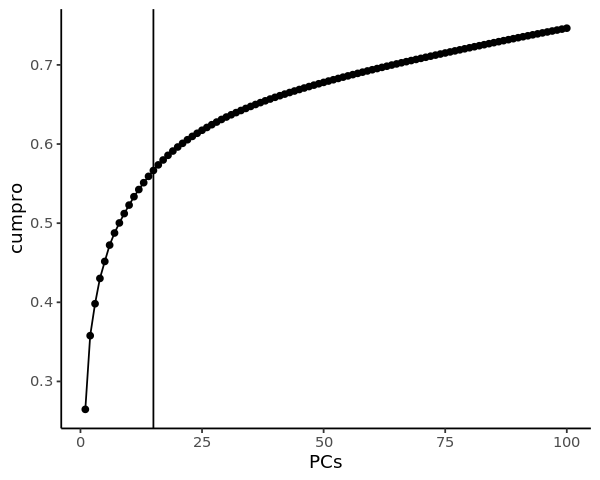

In [50]:
N = 100
x = 15
df0 = data.frame(PCs = 1:N,
                 cumpro = summary(pcs)$importance[3,1:N])
# head(df0)
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df0, aes(x = PCs, y = cumpro)) + geom_point() + geom_line() + theme_classic() + 
    geom_vline(xintercept = x)

In [25]:
df_pca = pcs$x
df_pca[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
iudw_1-d30-cluster0,-35.07262,9.681764,10.092621,6.917969,-2.0252131
iudw_1-d30-cluster1,-29.37936,-13.268347,-5.681135,5.459361,-0.3149459
iudw_1-d30-cluster2,-19.84818,-11.275084,-5.081225,12.616613,-3.4432523
iudw_1-d30-cluster3,-38.32949,-13.777421,-5.819239,2.722446,-3.2785382
iudw_1-d30-cluster4,-45.69710,1.691802,1.648058,2.658166,-6.2064227


In [26]:
env_filename = paste0(mydir,"10PCs.csv")
write.csv(df_pca[,1:10], env_filename, quote = F)

In [39]:
env_filename = paste0(mydir,"15PCs.csv")
write.csv(df_pca[,1:15], env_filename, quote = F)

In [40]:
env_filename = paste0(mydir,"20PCs.csv")
write.csv(df_pca[,1:20], env_filename, quote = F)

In [ ]:
## make feature-variant filter file

In [52]:
fvf_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv"
df_fvf = read.csv(fvf_filename, row.names = 1)
head(df_fvf,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [56]:
df_fvf_DA = df_fvf[grep("DA", df_fvf$label),]
nrow(df_fvf_DA)
head(df_fvf_DA,2)

[1] 2354

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
9,9_36382790_A_G,3.841554e-09,0.2678636,0.04547094,1.059426e-04,9,36336393,36487545,165,165,...,9,36382790,G,1,0.2575758,0.4164226,ENSG00000137075,2.826764e-03,1.610653e-03,DA_D30
143,9_37422656_C_T,1.080706e-18,0.4319122,0.04893397,1.254483e-09,9,37422663,37436987,165,165,...,9,37422656,T,1,0.3606061,0.6138967,ENSG00000137106,1.482853e-07,8.449102e-08,DA_D30


In [57]:
unique(as.character(df_fvf_DA$label))

[1] "DA_D30"     "DA_D52"     "DA_D52_ROT"

In [62]:
DA_fvf = df_fvf_DA[,c("snp_id","feature_id")]
colnames(DA_fvf)[2] = "feature"
head(DA_fvf,2)

,snp_id,feature
9,9_36382790_A_G,ENSG00000137075
143,9_37422656_C_T,ENSG00000137106


In [65]:
fvf_filename = paste0(mydir,"DA_eqtl_allconditions_FDR5pct.csv")
write.csv(DA_fvf, fvf_filename, quote = F, row.names = F)